### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

# Import the needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

Using TensorFlow backend.


### Define the class

In [42]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        np.random.seed(666)
        _inputs, _layer, _neurons, _output = architecture
        _layer = _layer if _layer < 3 else 2
        # Initialize values
        self.alpha        = alpha
        self.layers       = _layer
        self.neurons      = _neurons
        # Weights
        self.initialW = np.random.randn(_inputs, _neurons)
        self.middleW  = np.zeros( (_layer - 1, _neurons, _neurons) )
        self.lastW    = np.random.randn(_neurons, _output)
        # This will be used in the predict function
        self.calcW    = []
        # Bias
        self.initialb    = np.random.randn(_neurons)
        self.middleb     = np.random.randn(_layer - 1, _neurons)
        self.lastb       = np.random.randn(_output)
        for i in range(_layer - 1): 
            self.middleW[i] = np.random.randn(_neurons, _neurons)
        
        pass
    
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    @staticmethod
    def softmax(X):  
        # applies the softmax function to a set of values
        
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
    
    @staticmethod
    def sigmoid(x):
        # the sigmoid for a given input value
        
        return 1.0 / (1.0 + np.exp(-x))
    
    @staticmethod
    def sigmoid_deriv(x):
        # the derivative of the sigmoid
        
        return x * (1 - x)
    
    def predict(self, inputs):
        self.calcW = np.zeros( (self.layers, inputs.shape[0], self.neurons) )
        # Lvl 1
        self.calcW[0] = self.sigmoid( np.dot(inputs, self.initialW) + self.initialb )
        # Lvl 2
        for i in range(self.layers - 1):
            self.calcW[i + 1] = self.sigmoid( np.dot(self.calcW[i], self.middleW[i]) + self.middleb[i] )
            
        # Lvl 3 (last)
        return self.softmax( np.dot(self.calcW[len(self.calcW)-1], self.lastW) + self.lastb )
    
    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        err = []
        for i in range(epochs):
            # Forward propagation
            pred    = self.predict(inputs)
            lvl_err = labels - pred
            err.append( np.average(np.abs(lvl_err)) )
            
            # Back propagation
            lvl_delta_last   = lvl_err * self.sigmoid_deriv(pred)
            lvl_err_middle   = np.dot(lvl_delta_last, self.lastW.T)
            lvl_delta_middle = lvl_err_middle * self.sigmoid_deriv(self.calcW[-1])
            
            b_delta_last = np.sum(lvl_delta_last)
            
            self.lastb += b_delta_last * self.alpha
            self.lastW += np.dot(self.calcW[-1].T, lvl_delta_last) * self.alpha
            
            # First W & B
            self.initialW += np.dot(inputs.T, lvl_delta_middle) * self.alpha
            b_delta_last   = np.sum(lvl_delta_middle)
            self.initialb += b_delta_last * self.alpha
            
            # Middle W & B
            for j in range(self.layers - 1):
                tmp  = (len(self.middleW) - 1) - j
                tmp2 = (len(self.calcW) - 2) - j
                
                lvl_err_middle     = np.dot(lvl_delta_middle, self.middleW[tmp])
                self.middleW[tmp] += np.dot(self.calcW[tmp2].T, lvl_delta_middle) * self.alpha
                b_delta_middle     = np.sum(lvl_delta_middle)
                self.middleb[j]   += b_delta_middle * self.alpha
                lvl_delta_middle   = lvl_err_middle * self.sigmoid_deriv(self.calcW[tmp2])
            
            if i % displayUpdate == 0:
                print("Error: ", err[-1])
        
        return err         

### Test datasets

#### XOR

In [40]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T
labels     = np.array([0]*2 + [1]*2)
hot_labels = np.zeros((4, 2))
for i in range(4):
    hot_labels[i, XOR_labels[i]] = 1

2
Error:  0.5007407902007214
Error:  0.10209550637559031
Error:  0.035737155920182166
Error:  0.023535342119475975
Error:  0.018431656316427493
Error:  0.015535327994749847
Error:  0.013630026184359706
Error:  0.012262728729236679
Error:  0.011223658419686224
Error:  0.010401337156921453


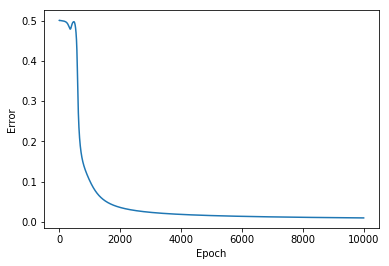

In [45]:
# inputs, hlayers, neurons, outputs
architecture = [2, 100, 4, 2]

nn = NeuralNetwork(architecture, 1)
err = nn.train(XOR_inputs, hot_labels, 10000, 1000)

f, p = plt.subplots(1,1)
p.set_xlabel('Epoch')
p.set_ylabel('Error')

p.plot(err)

#### Multiple classes

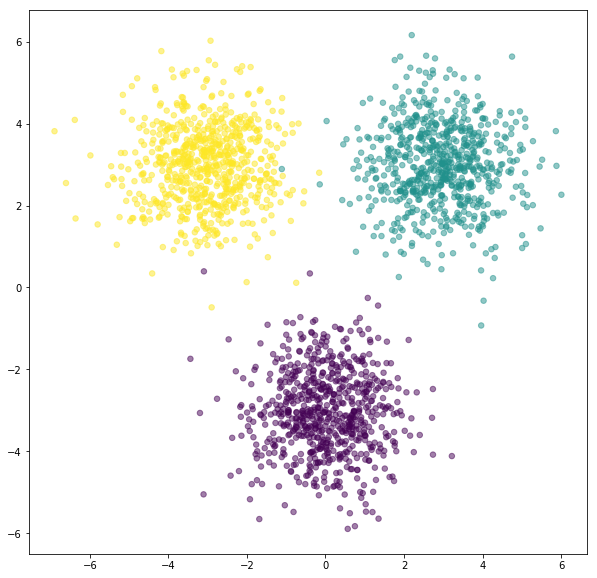

In [12]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Error:  0.4644998995249755
Error:  0.007856631440441051
Error:  0.005496453582995453
Error:  0.004564591865923237
Error:  0.0044251091250602686
Error:  0.004376045672169552
Error:  0.004322573017983479
Error:  0.0039772231088435386
Error:  0.003527406168496926
Error:  0.0033390092270638065


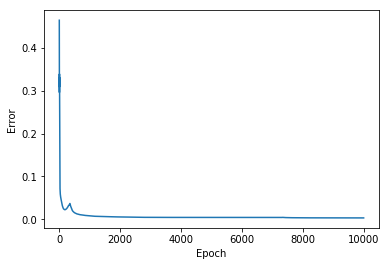

In [13]:
#TODO: Test the class with the multiple classes data
architecture2 = [2, 2, 5, 3]
nn2 = NeuralNetwork(architecture2, 0.01)
err2 = nn2.train(feature_set, one_hot_labels, 10000, 1000)

f, p2 = plt.subplots(1,1)
p2.set_xlabel('Epoch')
p2.set_ylabel('Error')

p2.plot(err2)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

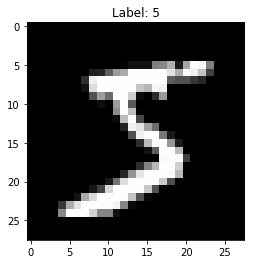

In [14]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [15]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

Error:  0.17594210107027777
Error:  0.11668413325403097
Error:  0.07622445222863586
Error:  0.061595477078676984
Error:  0.05329365304644705
Error:  0.04759604918202878
Error:  0.043389525253116554
Error:  0.04012260500229578
Error:  0.037483118756956244
Error:  0.03526281894176701


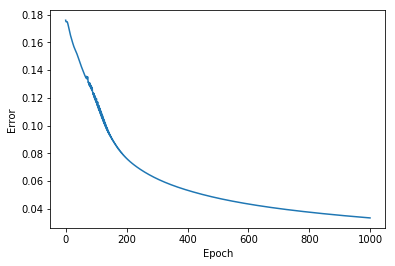

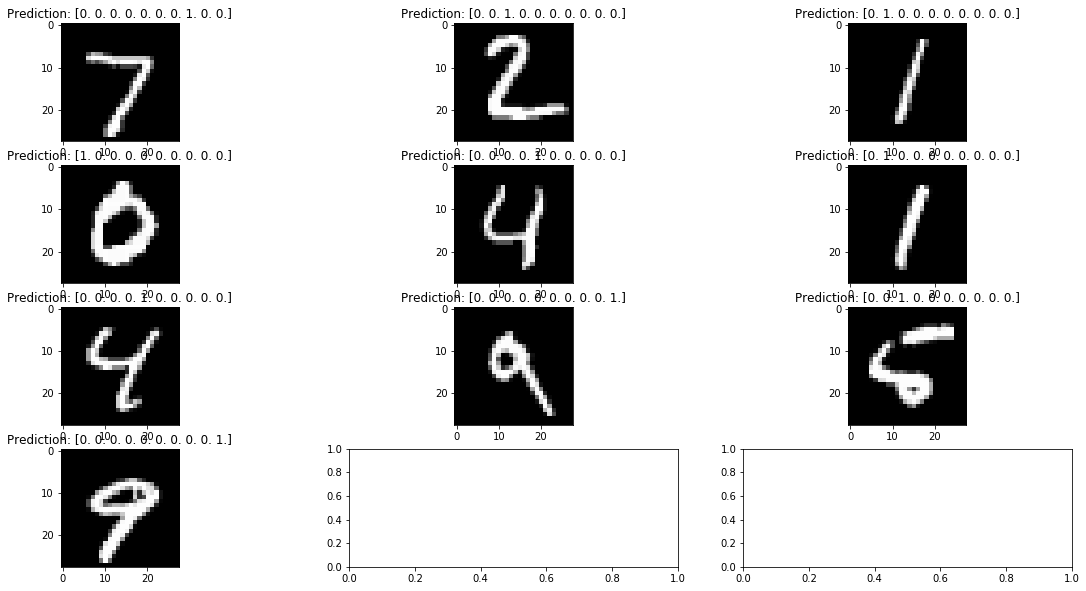

In [19]:
# Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.

architecture3 = [784, 1, 64, 10]
nn3 = NeuralNetwork(architecture3, 0.0007)
err3 = nn3.train(train_images[0:5000], train_labels[0:5000], 1000, 100)

f, p3 = plt.subplots(1,1)
p3.set_xlabel('Epoch')
p3.set_ylabel('Error')

p3.plot(err3)

tests = nn3.predict(test_images[0:1000])
# create one hot encoding on the test data
one_hot_test_labels = to_categorical(test_labels[0:1000])

np.set_printoptions(precision=3, suppress= True, linewidth=75)
# turn predictions to one hot encoding labels
predictions = np.copy(tests)
predictions[predictions > 0.5] = 1
predictions[predictions < 0.5] = 0

error_predictions = []
for index, (prediction, label) in enumerate(zip(predictions[0:10], one_hot_test_labels[0:10])):
    if not np.array_equal(prediction,label):
        error_predictions.append((index, prediction, label))

#show results
f, plots = plt.subplots((len(error_predictions)+3-1)//3, 3, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for img, plot in zip(error_predictions, plots):
    plot.imshow(test_images[img[0]].reshape(28,28), cmap = "gray")
    plot.set_title('Prediction: ' + str(img[1]))


After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**<br>
IMO, the images had poor quality and bad hand writting causing my NN to get confused at some times.
<hr>
2. **What could you try doing to improve the classification accuracy?**<br>
Before using the NN I would create a image proccesing pipeline that would make the images more clear (e.g. GaussianBlur) so that the hand writting could be more readable.